### Why we choosen Cosθ to find similarity between vectors?
* Because if two vectors are nearer then cosθ angle is lesser and the cosθ value is nearer ⩰ 1. 
* Above quality serves our requirement i.e., two text vectors are nearer in values(similar text values) then their cosθ value will be nearer to 1 and cosθ angle will be lesser.

In [219]:
import math
def angle_of_vectors(a,b,c,d):
    dotProduct = a*c + b*d
    # for three dimensional simply add dotProduct = a*c + b*d  + e*f 
    modOfVector1 = math.sqrt( a*a + b*b)*math.sqrt(c*c + d*d) 
    # for three dimensional simply add modOfVector = math.sqrt( a*a + b*b + e*e)*math.sqrt(c*c + d*d +f*f) 
    angle = dotProduct/modOfVector1
    print("Similarity/distance between ({},{}) & ({},{}) vectors".format(a,b,c,d))
    print("--"*25)
    print("Cosθ =",round(angle,2))
    angleInDegree = math.degrees(math.acos(angle))
    print("θ =",round(angleInDegree,2),"°\n")
     
angle_of_vectors(-2,2,2,2) #Similarity/distance between (-2,2) & (2,2)
angle_of_vectors(0,3,2,2) #Similarity/distance between (0,3) & (2,2)
angle_of_vectors(1,3,2,2) #Similarity/distance between (1,3) & (2,2)
angle_of_vectors(2,3,2,2) #Similarity/distance between (2,3) & (2,2)
angle_of_vectors(2,2,2,2) #Similarity/distance between (2,2) & (2,2)
angle_of_vectors(2,1,2,2) #Similarity/distance between (2,1) & (2,2)
angle_of_vectors(2,0,2,2) #Similarity/distance between (2,0) & (2,2)

Similarity/distance between (-2,2) & (2,2) vectors
--------------------------------------------------
Cosθ = 0.0
θ = 90.0 °

Similarity/distance between (0,3) & (2,2) vectors
--------------------------------------------------
Cosθ = 0.71
θ = 45.0 °

Similarity/distance between (1,3) & (2,2) vectors
--------------------------------------------------
Cosθ = 0.89
θ = 26.57 °

Similarity/distance between (2,3) & (2,2) vectors
--------------------------------------------------
Cosθ = 0.98
θ = 11.31 °

Similarity/distance between (2,2) & (2,2) vectors
--------------------------------------------------
Cosθ = 1.0
θ = 0.0 °

Similarity/distance between (2,1) & (2,2) vectors
--------------------------------------------------
Cosθ = 0.95
θ = 18.43 °

Similarity/distance between (2,0) & (2,2) vectors
--------------------------------------------------
Cosθ = 0.71
θ = 45.0 °



#### Key Note:
* From above vectors (1,3) is the 1st nearest vector to (2,2) and followed by vector (2,1).

&nbsp;

### Visualizing Above Vectors

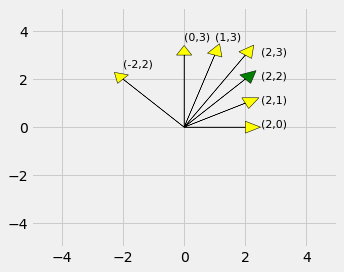

In [122]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight') 
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(5,4))
axes.arrow(0, 0, -2, 2, head_width=0.5, head_length=0.4, fc='yellow', ec='black')
axes.text(-2, 2.5, '(-2,2)',fontsize=11)
axes.arrow(0, 0, 0, 3, head_width=0.5, head_length=0.4, fc='yellow', ec='black')
axes.text(0, 3.6, '(0,3)',fontsize=11)
axes.arrow(0, 0, 1, 3, head_width=0.5, head_length=0.5, fc='yellow', ec='black')
axes.text(1, 3.6, '(1,3)',fontsize=11)
axes.arrow(0, 0, 2, 3, head_width=0.5, head_length=0.5, fc='yellow', ec='black')
axes.text(2.5, 3, '(2,3)',fontsize=11)
axes.arrow(0, 0, 2, 1, head_width=0.5, head_length=0.5, fc='yellow', ec='black')
axes.text(2.5, 1, '(2,1)',fontsize=11)
axes.arrow(0, 0, 2, 0, head_width=0.5, head_length=0.5, fc='yellow', ec='black')
axes.text(2.5, 0, '(2,0)',fontsize=11)
axes.arrow(0, 0, 2, 2, head_width=0.5, head_length=0.5, fc='green', ec='black')
axes.text(2.5, 2, '(2,2)',fontsize=11)

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.tight_layout()
plt.show()

&nbsp;

&nbsp;

### Cosine Similarity <span style='background:yellow'>Using Libraries<span>

#### Importing Libraries

In [159]:
import pandas as pd
import numpy as np
import os
import copy
import sys
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

&nbsp;

#### Sample Text Data

In [160]:
sample_data = pd.DataFrame({'Date':['apr_30','apr_28','apr_30','apr_28'],
               'Module':['datacenter','access','datacenter','access'],
               'Priority':['high','medium','medium','high'] })
sample_data

,Date,Module,Priority
0,apr_30,datacenter,high
1,apr_28,access,medium
2,apr_30,datacenter,medium
3,apr_28,access,high


&nbsp;

#### Converting Text into Numeric Vectors

In [162]:
documents = [str(text) for text in sample_data.values]
print('Corpus : ',documents,'\n')

#Initialize the count vectorier with English Stop Words
count_vectorizer = CountVectorizer(stop_words='english')

#Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(documents)
print('Text corpus converted into numeric vectors according to each row/document/sentence :')
print('--'*42)
print(count_data)

Corpus :  ["['apr_30' 'datacenter' 'high']", "['apr_28' 'access' 'medium']", "['apr_30' 'datacenter' 'medium']", "['apr_28' 'access' 'high']"] 

Text corpus converted into numeric vectors according to each row/document/sentence :
------------------------------------------------------------------------------------
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (1, 1)	1
  (1, 0)	1
  (1, 5)	1
  (2, 2)	1
  (2, 3)	1
  (2, 5)	1
  (3, 4)	1
  (3, 1)	1
  (3, 0)	1


In [220]:
print('Analyzing Count vectors as per documents values :')
print('--'*25)
print(count_vectorizer.get_feature_names())
for t in count_data:
    print(t.toarray()[0])

Analyzing Count vectors as per documents values :
--------------------------------------------------
['access', 'apr_28', 'apr_30', 'datacenter', 'high', 'medium']
[0 0 1 1 1 0]
[1 1 0 0 0 1]
[0 0 1 1 0 1]
[1 1 0 0 1 0]


&nbsp;

#### Cosine Similarity on given documents 

In [222]:
#Compute Cosine Similarity Matrix
cos_sim = cosine_similarity(count_data, count_data)
print(cos_sim)

[[1.         0.         0.66666667 0.33333333]
 [0.         1.         0.33333333 0.66666667]
 [0.66666667 0.33333333 1.         0.        ]
 [0.33333333 0.66666667 0.         1.        ]]


#### Key Note:
* As per cosine similarity values, we can see 1st document is similar to the 3rd document with value : 0.6666
* Similarly 2nd document is similar to the 4th document with value : 0.6666
* Actually Cosine Similarity values shown correctly, becuase 1st,3rd documets has similar texts &  2nd,4th documents has similar text values.

&nbsp;

### Cosine Similarity <span style='background:yellow'>Manual Calculation<span>

In [214]:
print(count_vectorizer.get_feature_names())
for t in count_data:
    print(t.toarray()[0])
# count_data_array = count_data.toarray()
# print(count_data_array,'\n')
# count_data_list = count_data_array.tolist()
# print(count_data_list,'\n')

['access', 'apr_28', 'apr_30', 'datacenter', 'high', 'medium']
[0 0 1 1 1 0]
[1 1 0 0 0 1]
[0 0 1 1 0 1]
[1 1 0 0 1 0]


In [218]:
def angle_of_vectors(a1,b1,c1,d1,e1,f1,a2,b2,c2,d2,e2,f2):
    dotProduct = a1*a2 + b1*b2 + c1*c2 + d1*d2 + e1*e2 + f1*f2
    # for three dimensional simply add dotProduct = a*c + b*d  + e*f 
    modOfVector1 = math.sqrt( a1*a1 + b1*b1 + c1*c1 + d1*d1 + e1*e1 + f1*f1)*math.sqrt(a2*a2 + b2*b2 + c2*c2 + d2*d2 + e2*e2 + f2*f2) 
    # for three dimensional simply add modOfVector = math.sqrt( a*a + b*b + e*e)*math.sqrt(c*c + d*d +f*f) 
    angle = dotProduct/modOfVector1
    print("Similarity/distance between 1st doc({},{},{},{},{},{}) & 3rd doc({},{},{},{},{},{}) vectors".format(a1,b1,c1,d1,e1,f1,a2,b2,c2,d2,e2,f2))
    print("--"*40)
    print("Cosθ =",round(angle,3))
    angleInDegree = math.degrees(math.acos(angle))
    print("θ =",round(angleInDegree,2),"°\n")
     
angle_of_vectors(0,0,1,1,1,0,0,0,1,1,0,1) #Similarity/distance between 1st doc(0,0,1,1,1,0) & 3rd doc(0,0,1,1,0,1) vectors


Similarity/distance between 1st doc(0,0,1,1,1,0) & 3rd doc(0,0,1,1,0,1) vectors
--------------------------------------------------------------------------------
Cosθ = 0.667
θ = 48.19 °



### Key Note:
* As Count Vectorizer created 6 dimension matrix of text document values.
* We have checked 1st document 6 dimension vector with 3rd document 6 dimension vector for similarity.
* We got same similarity value like sklearn.cosine similarity library(i.e., 0.667)
* Hence both 1st and 3rd documents are similar in given data.